In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/_pars

In [3]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 4.4.2
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.19.1
ffmpeg                    1.4
ffmpeg-python             0.2.0
filelock            

In [4]:
import tensorflow as tf
import os

In [5]:
os.listdir()

['main.ipynb', '.DS_Store', '.ipynb_checkpoints', 'sad-data', 'happy-data']

In [6]:
#avoid memory errors - out of memory error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
#data pre-processing
import cv2
import imghdr

In [9]:
data_dir = 'data'
img_extns = ['jpeg', 'png', 'jpg', 'bmp']

In [13]:
 os.listdir(os.path.join(data_dir, 'happy'))

['-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 '-businesspeople-choose-you-for-employment-or-recruitment-illustration-vector.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'friends-youth-happy-people-cartoon-W80EC5.jpg',
 'friends-happy-190821.jpg',
 'stock-photo-group-of-happy-people-isolated-over-white-background-102307264.jpg',
 'MV5BM2IzZGNkZmEtNDY1OS00ZmYyLTk3MmQtNTI4NzM4MTIzODAxXkEyXkFqcGc._V1_.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'Happy-woman-jumping.jpg',
 'happy-person-banner-1.jpg',
 'happy-family-happy-people.jpg',
 'tjhu4mgslz4.jpg',
 'happy-people-13772392.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'maxresdefault2.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'habits-of-happy-people-

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_extns:
                print("Image not in the required format{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))            

Image not in the required formatdata/happy/.DS_Store
Image not in the required formatdata/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in the required formatdata/happy/depositphotos_12186995-stock-photo-woman-drop-leaves-in-autumn.jpg
Image not in the required formatdata/sad/.DS_Store
Image not in the required formatdata/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in the required formatdata/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in the required formatdata/sad/sad-people-are-standing-rooftop-092116870_prevstill.jpeg
Image not in the required formatdata/sad/aaxh2l5ni.webp


In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
#using the data pipeline from the keras utitlities to make the data pre-processing easier
data = tf.keras.utils.image_dataset_from_directory(data_dir) 

Found 240 files belonging to 2 classes.


In [18]:
# iterator to access the data elements 
data_iterator = data.as_numpy_iterator()

In [23]:
# get another batch of data
batch = data_iterator.next()

In [26]:
# represent the data as the numpy
batch[0].shape

(32, 256, 256, 3)

In [27]:
# class 1 = sad, 0 = happy
batch[1]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

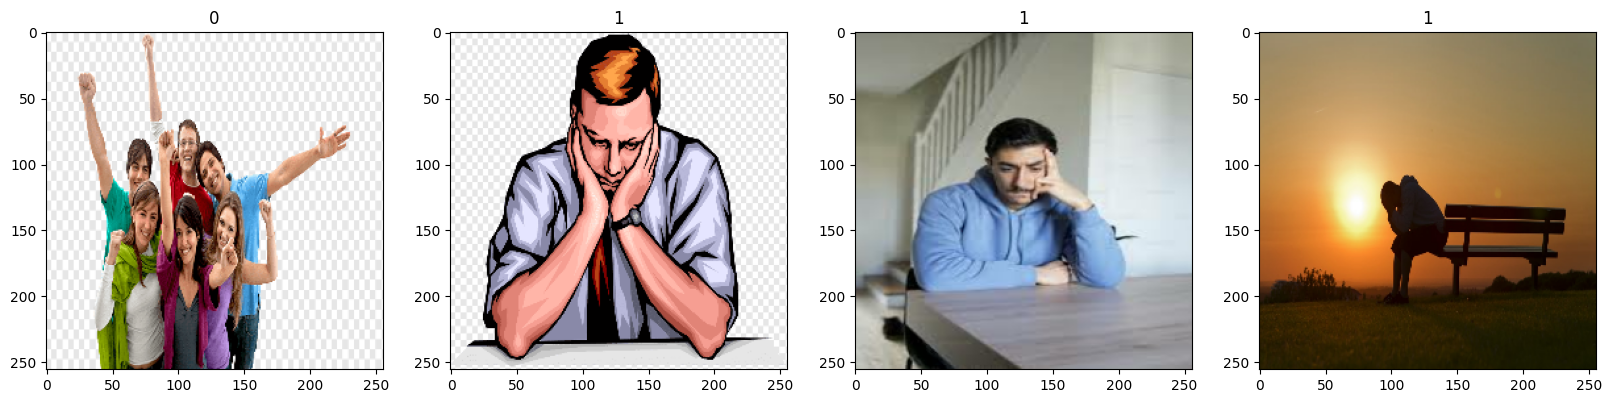

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess the data

In [30]:
 data = data.map(lambda x, y: ((x/255), y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

In [33]:
batch[0].max()

1.0

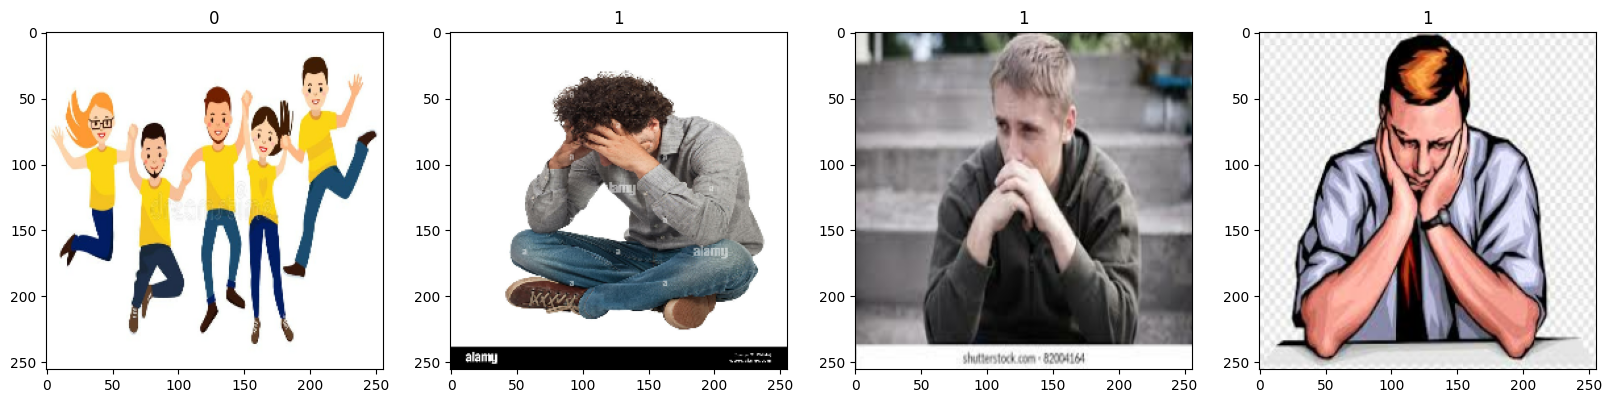

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

split data into training and testing

In [38]:
#total number of batches
len(data)

8

In [44]:
#partition into train, validation and test sizes
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [51]:
#partition the data into different purpose
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

deep learning model

In [53]:
#build a deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [66]:
#create the model
model = Sequential()

In [67]:
#add the layers

#input layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 253, 253, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

log directory is used to track the history of training the model

In [75]:
logdir = "logs"

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=20, validation_data = validation, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4187 - loss: 1.2590 - val_accuracy: 0.5000 - val_loss: 0.7530
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.6341 - loss: 0.5956 - val_accuracy: 0.7656 - val_loss: 0.5901
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.6806 - loss: 0.5879 - val_accuracy: 0.7031 - val_loss: 0.5396
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.7250 - loss: 0.5141 - val_accuracy: 0.8594 - val_loss: 0.4027
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - accuracy: 0.9069 - loss: 0.3919 - val_accuracy: 0.8750 - val_loss: 0.3382
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.8052 - loss: 0.4016 - val_accuracy: 0.9375 - val_loss: 0.2487
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.9049 - loss: 0.2775 - val_accuracy: 0.9062 - val_loss: 0.2629
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.9570 - loss: 0.1961 - val_accuracy: 0.8906 - val_loss:

In [78]:
hist

In [79]:
hist.history

{'accuracy': [0.48124998807907104,
  0.65625,
  0.7124999761581421,
  0.737500011920929,
  0.893750011920929,
  0.8062499761581421,
  0.90625,
  0.9375,
  0.9437500238418579,
  0.956250011920929,
  0.949999988079071,
  0.9437500238418579,
  0.949999988079071,
  0.96875,
  0.981249988079071,
  0.981249988079071,
  0.987500011920929,
  0.9937499761581421,
  0.9937499761581421,
  1.0],
 'loss': [1.182630181312561,
  0.6122918128967285,
  0.5801742672920227,
  0.5126492381095886,
  0.3697439432144165,
  0.4034718871116638,
  0.2740166187286377,
  0.2137388437986374,
  0.1765824556350708,
  0.1717667281627655,
  0.13690045475959778,
  0.130425363779068,
  0.09849293529987335,
  0.08743160218000412,
  0.08296133577823639,
  0.056266479194164276,
  0.03558359295129776,
  0.028798410668969154,
  0.02051868662238121,
  0.009828375652432442],
 'val_accuracy': [0.5,
  0.765625,
  0.703125,
  0.859375,
  0.875,
  0.9375,
  0.90625,
  0.890625,
  0.890625,
  0.953125,
  0.90625,
  0.953125,
  0.984

plot the performance

In [80]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')


<Figure size 640x480 with 0 Axes>